In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [16]:
df = pd.read_csv("weight-height.csv").sample(100)

In [17]:
df.head()

,Gender,Height,Weight
5268,Female,68.481369,180.922454
48,Male,69.179858,192.014335
7177,Female,63.476896,127.336697
3953,Male,70.706008,203.190611
777,Male,68.317245,179.370856


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df["Gender"]= le.fit_transform(df["Gender"])

In [20]:
df.head()

,Gender,Height,Weight
5268,0,68.481369,180.922454
48,1,69.179858,192.014335
7177,0,63.476896,127.336697
3953,1,70.706008,203.190611
777,1,68.317245,179.370856


In [21]:
x = df[['Height', "Weight"]]
y = df[["Gender"]]

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest= train_test_split(x, y, train_size=.8, random_state=1)

In [28]:
xtrain

,Height,Weight
7177,63.476896,127.336697
4892,72.760325,219.521254
3764,73.686170,220.711888
4071,67.964469,173.911384
8034,66.245018,143.797490
...,...,...
4502,66.710391,174.990112
1713,69.265140,172.300390
4662,67.923311,173.348646
958,70.327116,192.497161


In [29]:
lor = LogisticRegression()
lor.fit(xtrain,ytrain)

C:\Users\CreativeIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [30]:
lor.score(xtrain,ytrain)

0.925

In [31]:
lor.score(xtest,ytest)

0.7

In [34]:
y_pre= lor.predict(xtest)
y_pre

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [35]:
ytest

,Gender
1208,1
6432,0
5905,0
5112,0
5707,0
3222,1
5120,0
5489,0
8184,0
1897,1


In [38]:
lor.predict([[63.476896,127.336697]])

C:\Users\CreativeIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [39]:
ytrain

,Gender
7177,0
4892,1
3764,1
4071,1
8034,0
...,...
4502,1
1713,1
4662,1
958,1


In [40]:
lor.predict_proba(xtest)

array([[2.80242676e-02, 9.71975732e-01],
       [9.25968092e-01, 7.40319084e-02],
       [2.43528887e-01, 7.56471113e-01],
       [9.34265284e-01, 6.57347162e-02],
       [9.92463601e-01, 7.53639942e-03],
       [6.07025461e-02, 9.39297454e-01],
       [9.35843663e-01, 6.41563372e-02],
       [8.72579100e-01, 1.27420900e-01],
       [9.56664670e-01, 4.33353301e-02],
       [1.96185313e-04, 9.99803815e-01],
       [9.91313063e-01, 8.68693700e-03],
       [5.64686415e-01, 4.35313585e-01],
       [9.45401036e-01, 5.45989638e-02],
       [2.20368126e-01, 7.79631874e-01],
       [2.54356813e-01, 7.45643187e-01],
       [1.15150103e-04, 9.99884850e-01],
       [6.12836646e-01, 3.87163354e-01],
       [9.93417181e-01, 6.58281911e-03],
       [6.26192887e-03, 9.93738071e-01],
       [2.66942226e-01, 7.33057774e-01]])

In [41]:
cm = confusion_matrix(ytest, y_pre)

In [42]:
cm

array([[8, 3],
       [3, 6]])

<Axes: >

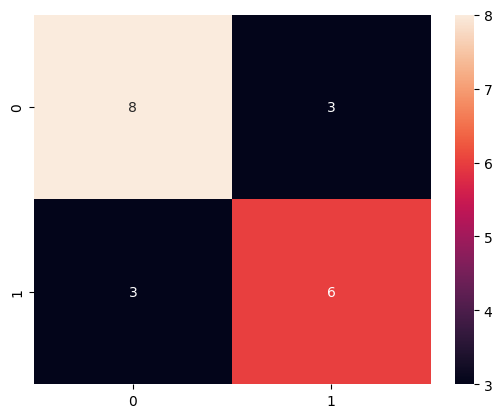

In [44]:
sns.heatmap(cm, annot= True)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [46]:
accuracy_score(ytest,y_pre)

0.7

In [47]:
precision = precision_score(ytest,y_pre)
precision

0.6666666666666666

In [48]:
6/9

0.6666666666666666

In [50]:
recall= recall_score(ytest,y_pre)

In [51]:
recall

0.6666666666666666

In [52]:
clas = classification_report(ytest,y_pre)

In [54]:
print(clas)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



In [55]:
clas

'              precision    recall  f1-score   support\n\n           0       0.73      0.73      0.73        11\n           1       0.67      0.67      0.67         9\n\n    accuracy                           0.70        20\n   macro avg       0.70      0.70      0.70        20\nweighted avg       0.70      0.70      0.70        20\n'